# Assignment 4
### Ostapovich Oleg

In [143]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Task 1

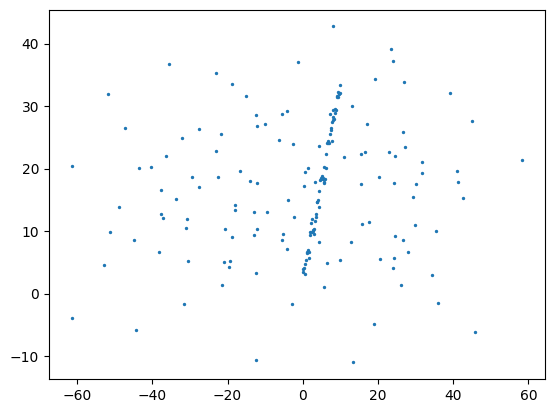

In [144]:
numofdots = 60
# general noise
x, y = np.random.normal(15,12,numofdots*2), np.random.normal(0,30,numofdots*2)
# line function with noise
a = 3
b = 3
t = np.linspace(0, 10, numofdots)
fun = a*t+b
fun = fun + np.random.normal(0,1,numofdots)

funx = np.concatenate((x,fun))
funy = np.concatenate((y,t))
plt.figure(frameon=False)
plt.scatter(funy, funx, s=2)
# plt.axis('off')
# plt.savefig('noisydata', bbox_inches='tight', pad_inches=0)
plt.show()

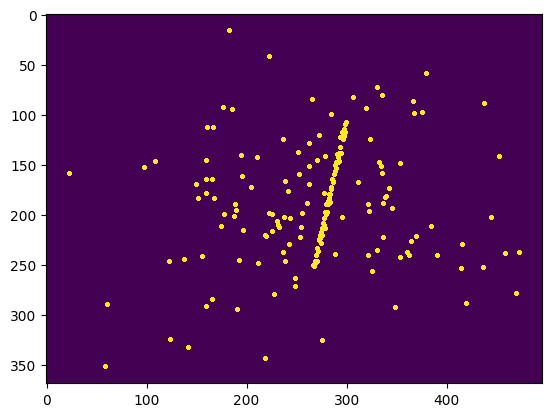

In [145]:
img = cv2.imread("noisydata.png") # read image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # to grayscale
gray = cv2.bitwise_not(gray) # invert colors
plt.imshow(gray)
plt.show()

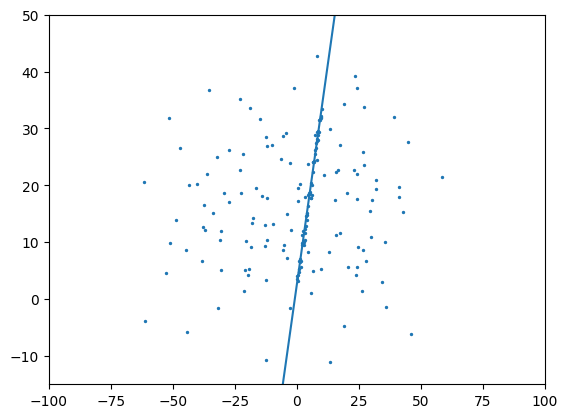

In [146]:
from skimage.measure import LineModelND, ransac

data = np.column_stack([funy, funx]) # concatenate data

ransac_model, _ = ransac(data, LineModelND, min_samples=10,
                               residual_threshold=2, max_trials=2000) # create ransac

line_x = np.arange(-50, 50)
line_y = ransac_model.predict_y(line_x) # create line


plt.scatter(funy, funx, s=2)
plt.plot(line_x, line_y, '-')
plt.xlim(-100,100)
plt.ylim(-15,50)
plt.show()

In [147]:
b = ransac_model.predict_y([0])[0]
a = (ransac_model.predict_y([10])[0] - b)/10
a,b # line coefficients

(3.0996867280802904, 2.7075103871536754)

# Task 2

In [148]:
import numpy as np
import open3d as o3d

This data was gathered from internet: http://redwood-data.org/indoor_lidar_rgbd/download.html
I also upload it on Moodle.

In [149]:
cloud = o3d.io.read_point_cloud('data/mesh_35.ply')

In [150]:
np_cloud = np.asarray(cloud.points)

Visualization:
Execute cells below to visualize dataset

In [151]:
o3d.visualization.draw_geometries([cloud])

In [152]:
'''
%matplotlib auto
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(np_cloud[:,0],np_cloud[:,1],np_cloud[:,2], s=2)
plt.show()
'''

'\n%matplotlib auto\nfig = plt.figure(figsize = (10, 7))\nax = plt.axes(projection ="3d")\nax.scatter3D(np_cloud[:,0],np_cloud[:,1],np_cloud[:,2], s=2)\nplt.show()\n'

Slicing data:

In [153]:
np_cloud.max(axis=0)

array([3.25390625, 2.9071785 , 3.19461305])

In [154]:
arr=[]
for line in np_cloud:
    if line[0]>1 and line[0]<2.2 and line[1]<2.5:
      arr.append(line)
arr = np.array(arr)

In [155]:
cloud.points = o3d.utility.Vector3dVector(arr)
o3d.visualization.draw_geometries([cloud])

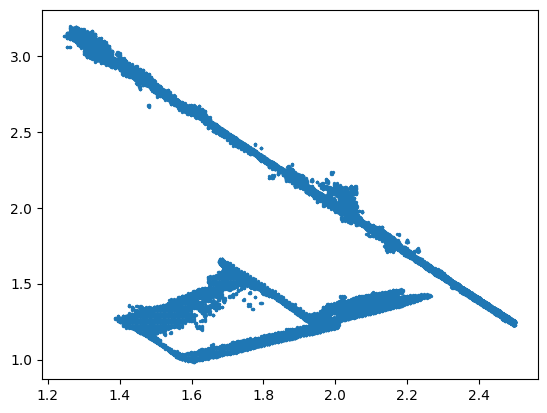

In [156]:
%matplotlib inline
plt.scatter(arr[:,1],arr[:,2], s=2)
# plt.axis('off')
plt.savefig('LiDAR', bbox_inches='tight', pad_inches=0)
plt.show()

Detecting floor

In [157]:
plane_model, inliers = cloud.segment_plane(distance_threshold=0.1,
                                         ransac_n=3,
                                         num_iterations=3000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

chair_cloud = cloud.select_by_index(inliers, invert=True)
chair_cloud.paint_uniform_color([1.0, 1.0, 0])

original_cloud = o3d.io.read_point_cloud('data/mesh_35.ply')

o3d.visualization.draw_geometries([chair_cloud, original_cloud])

Plane equation: -0.01x + 0.84y + 0.54z + -2.76 = 0


Measuring distance

In [158]:
distance_min = -1
distance_max = -1

for line in np.asarray(chair_cloud.points):
    dst_to_point = np.sqrt(line[0]**2 + line[1]**2 + line[2]**2)
    if dst_to_point < distance_min or distance_min == -1:
        distance_min = dst_to_point
    if dst_to_point > distance_max or distance_max == -1:
        distance_max = dst_to_point

print('Nearest point in ' + str(distance_min)[:3] + ' meters')
print('Further point in ' + str(distance_max)[:3] + ' meters')

Nearest point in 2.4 meters
Further point in 3.6 meters
